## Manual Backpropagation Part 2: Neuron

In [1]:
%cd ..

d:\youtube-andrej-karpathy\neural-networks-zero-to-hero


In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt 
%matplotlib inline 

import math
import numpy as np

from utilities.utils import draw_dot

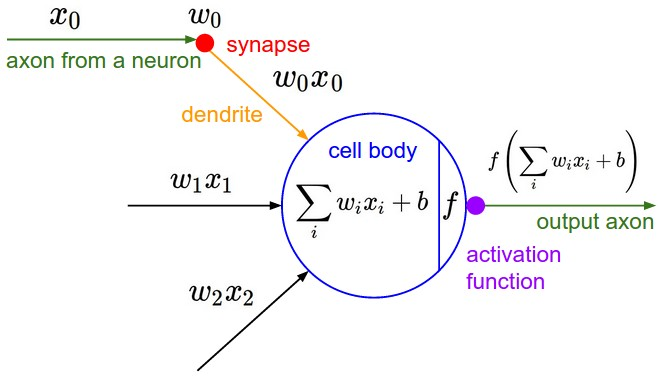

In [3]:
Image(filename=r'01-neural-networks-and-back-propagation\assets\neuron_model.jpeg')

`x` represents the inputs and we have synapses which have weights `w` in them. The synapse interacts with the input to the neuron mulitplicatively so the product `w*x` flows to the cell body.
  
The cell body has a bias `b`. 
  
This result is passed through an activation function which is generally a squashing function. 

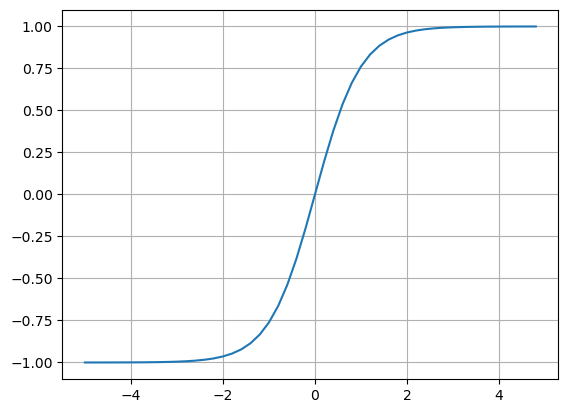

In [4]:
# tanh activation function | [-1, 1]

plt.plot(
    np.arange(-5, 5, 0.2),
    np.tanh(np.arange(-5, 5, 0.2))
)

plt.grid()

### Implementing a Neuron

In [5]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

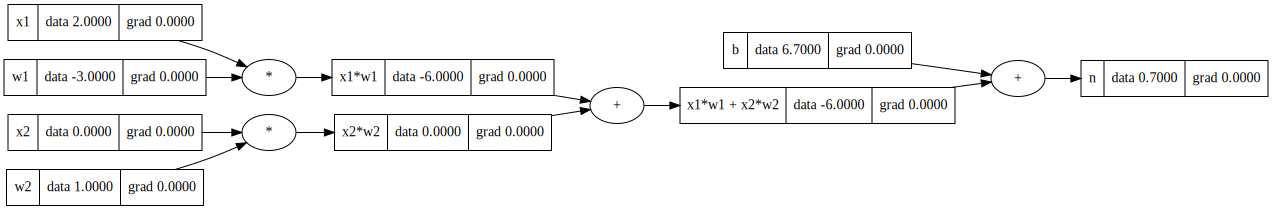

In [6]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1 
x1w1.label = "x1*w1"

x2w2 = x2 * w2 
x2w2.label = "x2*w2"

# Summation
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"

# Adding bias
# n represents the cell body without the activation
n = x1w1x2w2 + b 
n.label = 'n'

# Plot 
draw_dot(n)

## Adding the Activation 

**Tanh Formula**

$$tanh x = \frac{sinh x}{cosh x} = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}$$

In [7]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data 
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
        

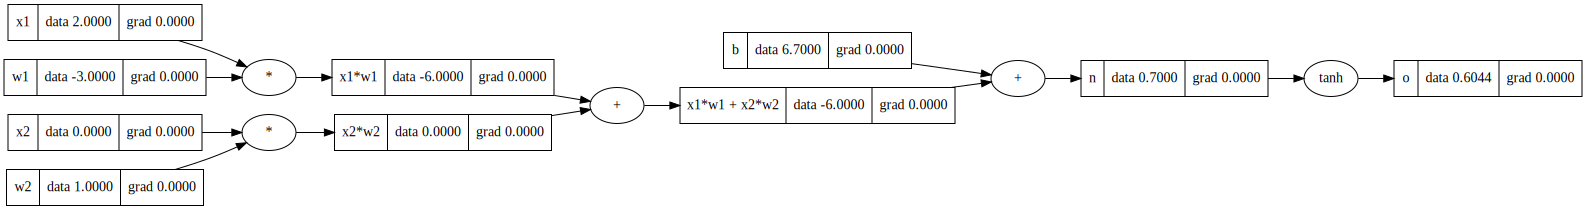

In [8]:
# Adding bias
# n represents the cell body without the activation
n = x1w1x2w2 + b 
n.label = 'n'

# Output 
o = n.tanh()
o.label = 'o'

draw_dot(o)

### Setup values for inputs, weights and bias

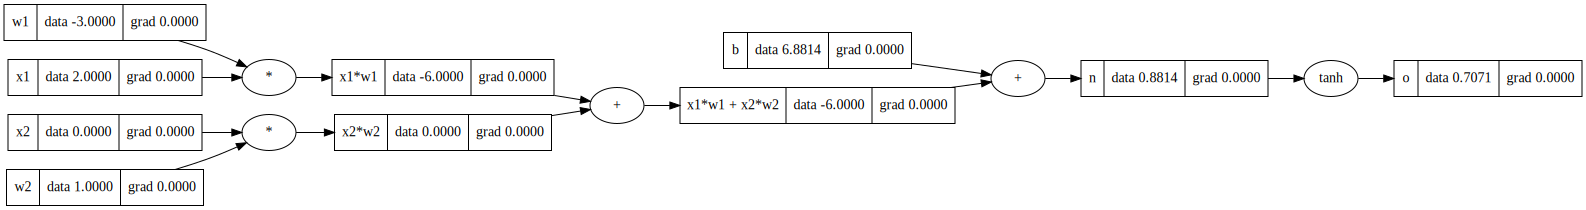

In [9]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias
b = Value(6.8813735870195432, label='b') # Pre calculated value to ensure backprop values are nice!

x1w1 = x1 * w1 
x1w1.label = "x1*w1"

x2w2 = x2 * w2 
x2w2.label = "x2*w2"

# Summation
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"

# Adding bias
# n represents the cell body without the activation
n = x1w1x2w2 + b 
n.label = 'n'

# Adding bias
# n represents the cell body without the activation
n = x1w1x2w2 + b 
n.label = 'n'

# Output 
o = n.tanh()
o.label = 'o'

draw_dot(o)

### Manual Backpropagation

Now we start the backpropagation

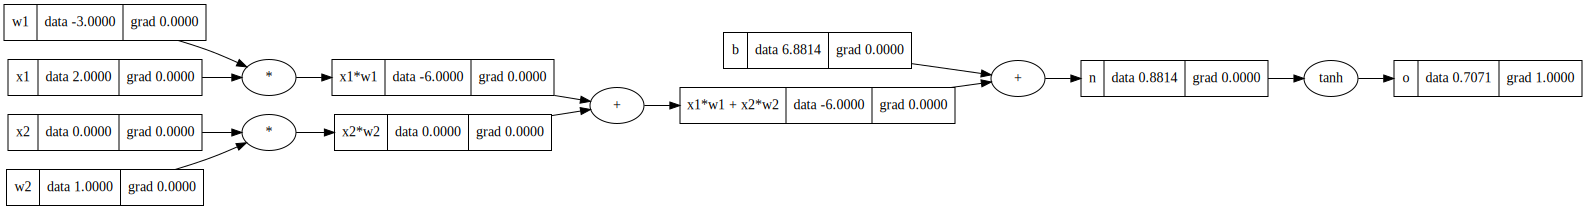

In [11]:
# Derivative of o w.r.t. o
o.grad = 1.0

draw_dot(o)

For derivative of `o` w.r.t. `n` we need `do/dn`.  

We have, 
$$o = tanh(n)$$
  
Also, 
$$\frac{d(tanh)}{dx} = 1 - tanh^2x$$
  
Thus, 
$$\frac{do}{dn} = 1 - tanh^2n$$
$$             = 1 - o^2 

In [15]:
# do/dn
1 - o.data**2

0.4999999999999999

In [16]:
n.grad = 0.5

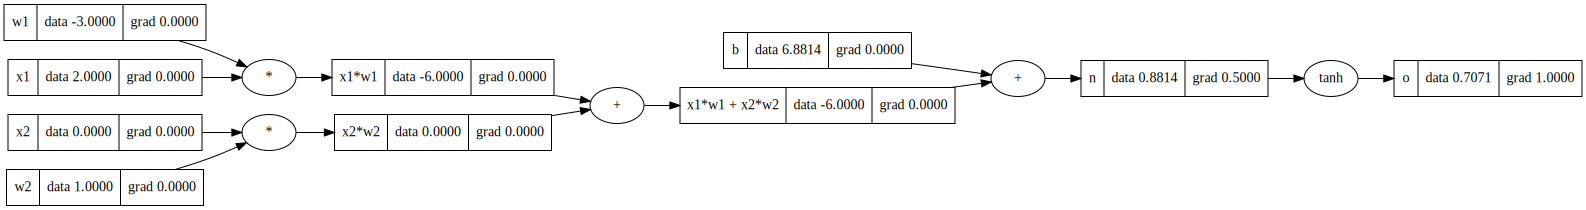

In [18]:
draw_dot(o)

In [19]:
# Next we have a + node, and we know that gradient flows through a + node

b.grad = 0.5 
x1w1x2w2.grad = 0.5

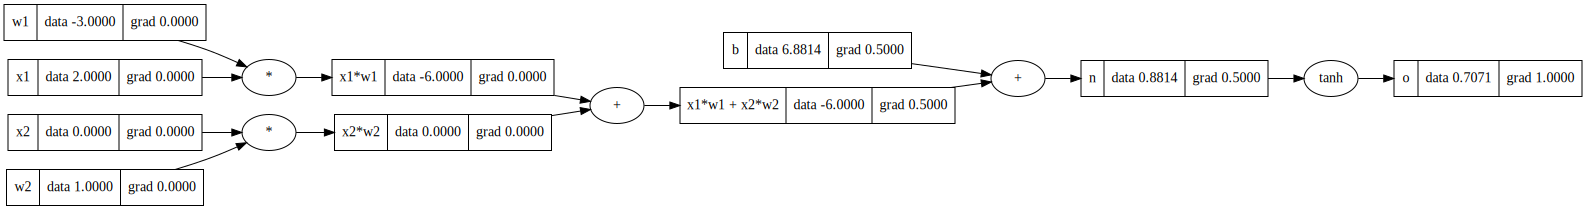

In [20]:
draw_dot(o)

In [21]:
# Again we have a + node, so the gradient flows

x1w1.grad = 0.5 
x2w2.grad = 0.5

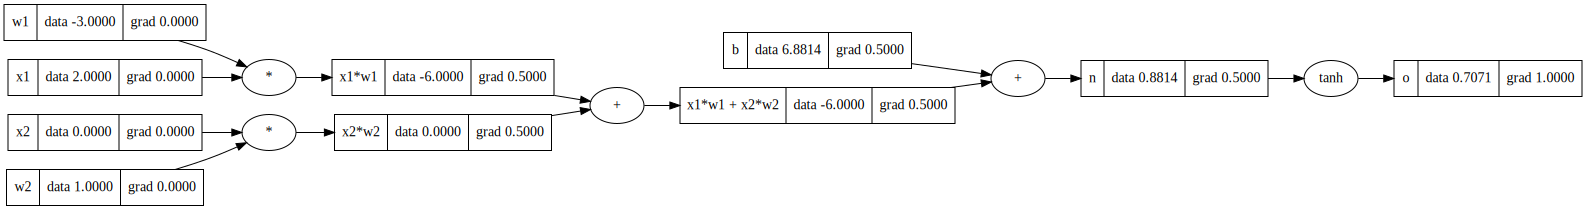

In [22]:
draw_dot(o)

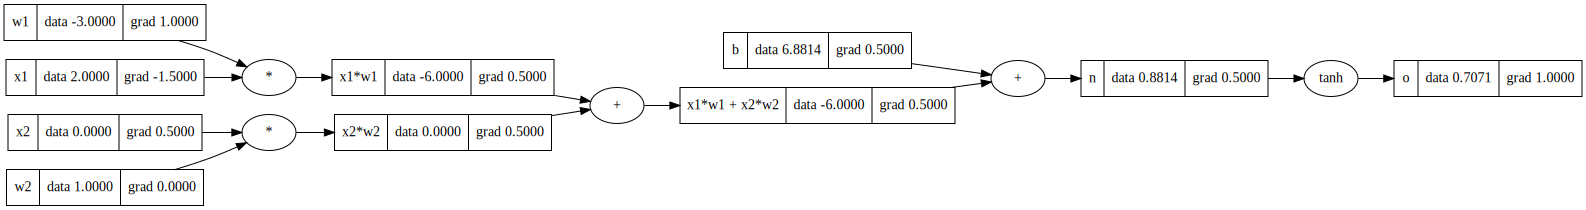

In [23]:
# Finally we have a product node
# Local derivate is the data value of the other node
# Derivative is the product of local derivative with the next derivative

w1.grad = x1.data * x1w1.grad 
x1.grad = w1.data * x1w1.grad 

x2.grad = w2.data * x2w2.grad 
w2.grad = x2.data * x2w2.grad 

draw_dot(o)

Intuitive understanding of why `w2.grad = 0`  
  
`w2.grad` basically tells us how the output will change if we change value of `w2`.  
But here we are multiplying `w2` with `x2` and `x2.data = 0` so regardless of what value we take for `w2` since it is multiplied with `x2` it will \have no effect on the final output hence the gradient for `w2` is 0

---

### Backpropagation Function for each operation

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out 

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data 
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
        